# Core-CT Visualization Demo

This Jupyter Notebook demonstrates how the `core-ct` library can be used, focusing on tools to visualize the core.
In this notebook, we will go over an example workflow for visualizing and analyzing a core CT scan, including:
* Creating a `Core` from dicom files
* Displaying various views of the core
* Trimming unwanted space from the `Core` object
* Taking a single slice from a core
* Creating a brightness trace plot from a core slice

## Setup
### 1. Import Necessary Libraries

In [1]:
import os
import matplotlib.pyplot as plt
from core_ct import importers
from core_ct import visualize

### 2. Set Behavior of Matplotlib
The `IPython` kernel allows us to use magic commands to customize the behavior of our notebook. We will use a magic command to control the behavior of `matplotlib`.  

* To create non-interactive plots that appear inside the notebook, use `%matplotlib inline`. This is the default behavior, so you do not need to state it explicitly.
* To create interactive plots that open in a new window, use `%matplotlib`. You may need to write this command twice to get the desired behavior. This also provides a basic GUI to tweak subplot spacing.
* To create interactive plots that appear inside the notebook, use `%matplotlib widget`. This may cause more lag when interacting with the plots than opening it in a separate window.

You can also add magic commands throughout the notebook if you want different behaviors for different plots. Note that you cannot change the GUI backend mid-notebook, but you can change between `inline` and interactive. A full list of matplotlib magic options can be found [here](https://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib).

In [2]:
# Choose your desired plotting behavior by commenting/uncommenting lines in this cell

# %matplotlib inline

%matplotlib widget

# %matplotlib 
# %matplotlib

## Load the Core Data
For this demo, we will be using sediment core CT scan data from the 2023 paper "The life and death of a subglacial lake in West Antarctica." by [Siegfried, Venturelli et al.](https://pubs.geoscienceworld.org/gsa/geology/article/51/5/434/620903/The-life-and-death-of-a-subglacial-lake-in-West) [[1]](#References).  

To access this data, download and unzip the file `data.zip` from Zenodo, which you can find [here](https://zenodo.org/records/7597019). (Uncompressed size ~32 GB) [[2]](#References).
The data we will use is under `data/cores/01UW-C`. Load this using `dicom` from the `importers` module. 

In [3]:
dir_path = os.path.join("..", "data", "cores", "01UW-C")
# the force option ignores files that produce errors (non-DICOMs)
my_core = importers.dicom(dir = dir_path, force = True)

## Displaying the Core
Before we do any processing of the core, we want to get some information about it, including:
* the dimensions of the 3D `pixel_array` representing the entire core
* how the core is oriented, that is, how the axes of the core scan correspond to the axes of the `pixel_array`.

The shape of the core is:  (1560, 1560, 34)


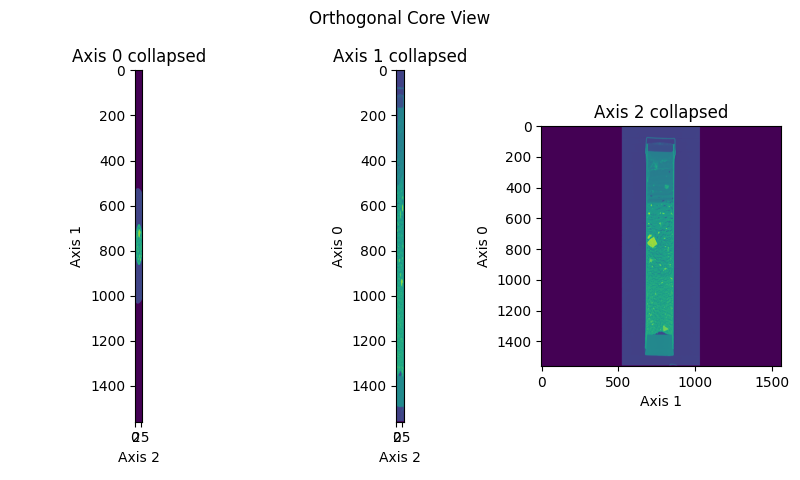

In [4]:
# TODO update shape after more PRs are merged
print("The shape of the core is: ", my_core.pixel_array.shape) 

# display orthogonal views of the core sliced along each axis
fig, (ax1, ax2, ax3) = visualize.display_core(my_core)
fig.set_figwidth(8)
plt.show()

From this visualization, we can see that axis 0 is the long axis of the core (down the page), axis 1 goes across the page, and axis 2 goes into the page. We also see that clearly we want to collapse along axis 2 to get a nice cross-section of the entire core. This will become the axis we will pass to the `slice` method.

## Trimming the Core
We know we want to slice at a location along axis 2, but aren't sure exactly where we want to trim the core. We can visualize possible trim lines on the core using `visualize_trim`. Note that you first need to take a slice of the core before you can plot the trim lines. If the core was reasonably centered when scanned, you can simply slice at the middle index. Not slicing near the true diameter of the core may cause you to trim off more of the core than desired.

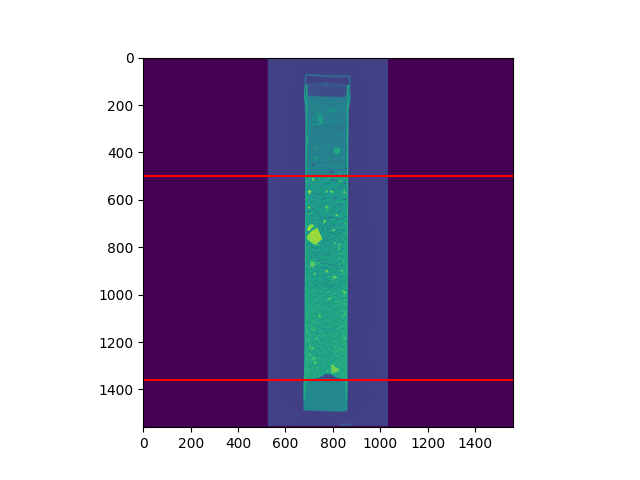

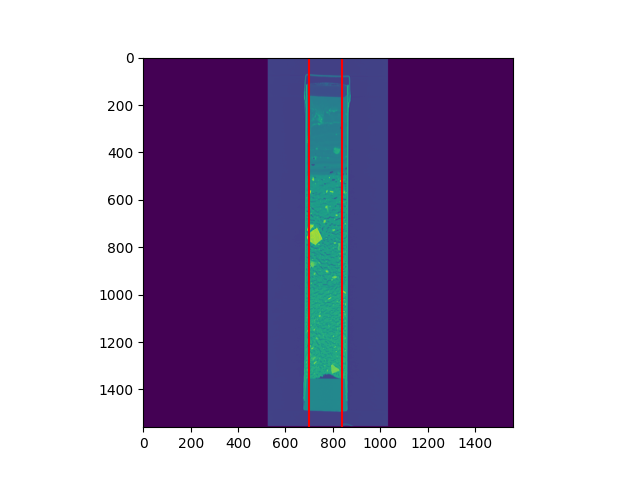

In [5]:
#TODO potentially update how visualizing trimming is done, and perhaps add visualize slice
core_slice = my_core.slice(axis = 2, loc = my_core.pixel_array.shape[2]//2)

# vertical trim
visualize.visualize_trim(slice_2d = core_slice, 
                        axis = 1, 
                        loc_start = 700, 
                        loc_end = 720) # loc_end is distance from end

# horizontal trim
visualize.visualize_trim(slice_2d = core_slice, 
                        axis = 0, 
                        loc_start = 500, 
                        loc_end = 200)
plt.show()

Now that we have the locations of our desired trim, we can actually trim the core using the `trim` method. Then we can verify the trim worked by looking at the new shape of the `pixel_array` and display the new trimmed core. 

(860, 140, 34)


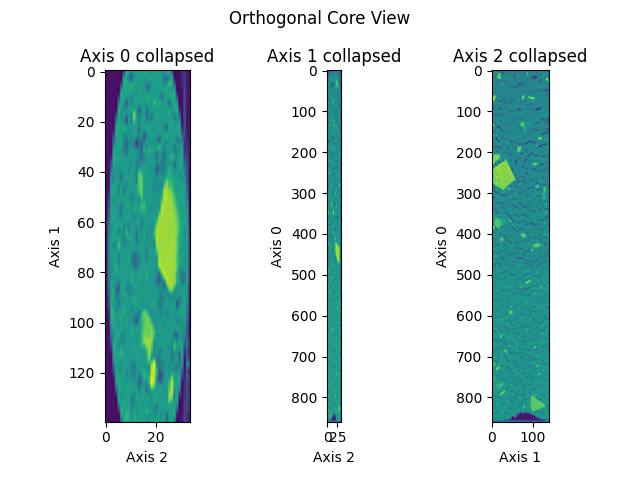

In [6]:
# TODO change to not be in place
my_core.trim(axis = 1, loc_start = 700, loc_end = 720)

my_core.trim(axis=0, loc_start = 500, loc_end = 200) # is symmetric 

# we can verify the trim worked
core_dim = my_core.pixel_array.shape
print(core_dim)

# and display the new trimmed core
fig, (ax1, ax2, ax3) = visualize.display_core(my_core)

## Slicing the Core and Creating a Brightness Trace
Now that we have trimmed the core, we want to take a slice and perform analysis on that slice. We can use the `display_slice` method to display the slice along with a colorbar. If you are using an interactive window, you can drag the colorbar to change the color mapping.

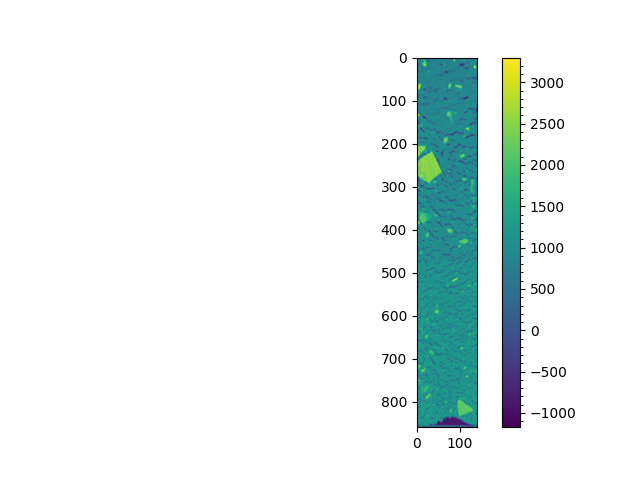

In [8]:
axis = 2
slice_loc = core_dim[axis]//2
my_slice = my_core.slice(axis=axis, loc=slice_loc)
visualize.display_slice(my_slice)
plt.show()

Finally, use the function `display_slice_bt_std` to create a graph of the slice next to the brightness trace across it and the standard deviation of the brightness. 

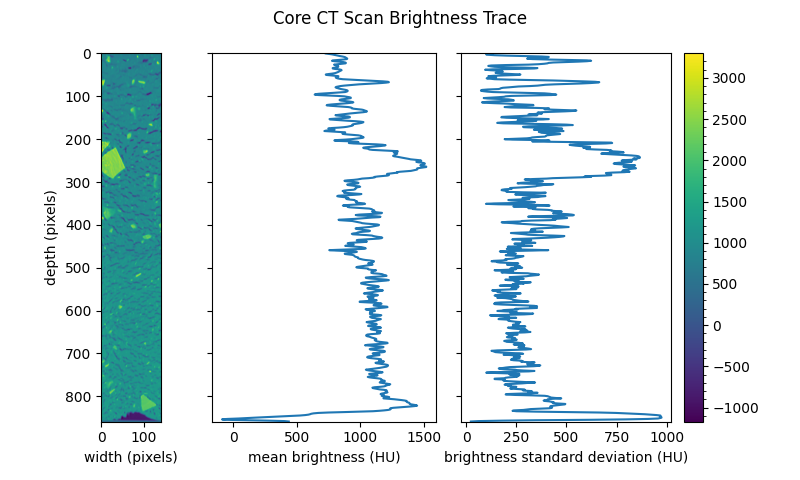

In [9]:
fig, (ax1, ax2, ax3) = visualize.display_slice_bt_std(my_slice)
# you can change different plot elements attached to fig or the axes
# fig.suptitle("Sediment Core Brightness Trace")
fig.set_figwidth(8)
plt.show()

## References
[1] Siegfried, M. R., Venturelli, R. A., Patterson, M. O., Arnuk, W., Campbell, T. D., Gustafson, C. D., Michaud, A. B., Galton-Fenzi, B. K., Hausner, M. B., Holzschuh, S. N., Huber, B., Mankoff, K. D., Schroeder, D. M., Summers, P., Tyler, S., Carter, S. P., Fricker, H. A., Harwood, D. M., Leventer, A., Rosenheim, B. E., Skidmore, M. L., Priscu, J. C., and the SALSA Science Team. (2023). The life and death of a subglacial lake in West Antarctica. Geology. https://doi.org/10.1130/G50995.1

[2]  Siegfried, M. R., Venturelli, R. A., Patterson, M. O., Arnuk, W., Campbell, Gustafson, Chloe D., C. D., Michaud, A. B., Galton-Fenzi, B. K., Hausner, M. B., Holzschuh, S. N., Huber, B., Mankoff, K. D., Schroeder, D. M., Summers, P. T., Tyler, S., Carter, S. P., Fricker, H. A., Harwood, D. M., Leventer, A., Rosenheim, B. E., Skidmore, M. L., Priscu, J. P., and the SALSA Science Team. (2023). Data for Siegfried*, Venturelli*, et al., 2023, Geology (1.0) [Data set]. Zenodo. https://doi.org/10.5281/ZENODO.7597019